## Data Cleansing

Data Cleansing berarti proses mengidentifikasi bagian data yang salah, tidak lengkap, tidak akurat, tidak relevan atau hilang dan kemudian memodifikasi, mengganti atau menghapusnya sesuai dengan kebutuhan.

- Data cleansing untuk treatment terhadap Missing Data
- Data cleansing untuk treatment Outliers
- Data cleansing untuk treatment Deduplikasi Data

## Missing Data

Dataset yang ditemui di real-world biasanya akan memiliki banyak missing value. Kemampuan untuk treatment missing value sangat penting karena jika membiarkan missing value itu dapat memengaruhi analisis dan machine learning model.

1. Check Kolom yang memiliki Missing Value
2. Treatment terhadap Missing Data :
    - Leave as it is (dibiarkan)
    - Filling the missing value (imputasi) - menggunakan mean, modus, median ataupun menggunakan predictive modelling
    - Drop them (hapus row yang mengandung missing value)

In [2]:
import pandas as pd
import numpy as np
import io
import pandas_profiling
retail_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced_data_quality.csv')

# Check kolom yang memiliki missing data
print('Check kolom yang memiliki missing data:')
print(retail_raw.isnull().any())

# Filling the missing value (imputasi)
print('\nFilling the missing value (imputasi):')
print(retail_raw['quantity'].fillna(retail_raw.quantity.mean()))

# Drop missing value
print('\nDrop missing value:')
print(retail_raw['quantity'].dropna())

Check kolom yang memiliki missing data:
order_id       False
order_date     False
customer_id    False
city            True
province        True
product_id      True
brand          False
quantity        True
item_price      True
dtype: bool

Filling the missing value (imputasi):
0       10.0
1        2.0
2        8.0
3        4.0
4        2.0
        ... 
4995     2.0
4996     3.0
4997     4.0
4998     8.0
4999     1.0
Name: quantity, Length: 5000, dtype: float64

Drop missing value:
0       10.0
1        2.0
2        8.0
3        4.0
4        2.0
        ... 
4995     2.0
4996     3.0
4997     4.0
4998     8.0
4999     1.0
Name: quantity, Length: 4986, dtype: float64


jumlah baris yang berbeda pada kolom quantity. Proses imputasi tentunya akan mempertahankan jumlah baris dari data karena missing value diisi dengan suatu nilai yang pada kasus kita ini menggunakan nilai rata-rata kolom bersangkutan. Sementara drop missing value tentu akan membuang baris yang memiliki missing value yang mengakibatkan jumlah baris data berkurang.

Tugas Praktek
- Menemukan Missing Value dan Melengkapi dengan mean pada kolom item_price

In [3]:
import pandas as pd
import numpy as np
import io
import pandas_profiling
retail_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced_data_quality.csv')

print(retail_raw['item_price'].fillna(retail_raw['item_price'].mean()))

0       7.400000e+05
1       6.040000e+05
2       1.045000e+06
3       2.050000e+05
4       9.337427e+05
            ...     
4995    4.500000e+05
4996    1.465000e+06
4997    7.470000e+05
4998    6.950000e+05
4999    1.045000e+06
Name: item_price, Length: 5000, dtype: float64


## Outliers

Outliers merupakan data observasi yang muncul dengan nilai-nilai ekstrim. Yang dimaksud dengan nilai-nilai ekstrim dalam observasi adalah nilai yang jauh atau beda sama sekali dengan sebagian besar nilai lain dalam kelompoknya.

1. Pengecekan Outlier dengan boxplot
2. Pengecekan Outlier dengan IQR
3. Treatment terhadap outliers antara lain:
    - Remove the outliers (dibuang)
    - Filling the missing value (imputasi)
    - Capping
    - Prediction

## Box Plot

penjelasan Boxplot ini merupakan materi baru dari medium, bukan termasuk di DQ_lab Course:
- vert mengatur orientasi plot menjadi horizontal saat False. Orientasi default adalah vertikal.
- showmeans menunjukkan mean ketikaTrue.
- meanline merepresentasikan mean pada baris ketikaTrue.
- labels: label data Anda.
- patch_artist menentukan cara menggambar grafik.
- medianprops menunjukkan sifat-sifat garis yang mewakili median.
- meanprops menunjukkan sifat-sifat garis yang mewakili mean.

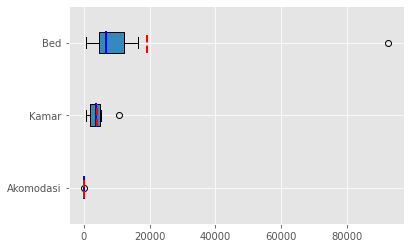

In [41]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Dataset contoh
Akomodasi = (20, 116, 61, 58, 64,9 )
Kamar = (1503, 10732, 3653, 5206, 2187, 4781, 523)
Bed = (92579, 16418, 6015, 7832, 2885, 6800, 786)

# Cek Outlier dengan boxplot
fig, ax = plt.subplots()
ax.boxplot((Akomodasi, Kamar, Bed), vert=False, showmeans=True, meanline=True,
           labels=('Akomodasi', 'Kamar', 'Bed'), patch_artist=True,
           medianprops={'linewidth': 2, 'color': 'blue'},
           meanprops={'linewidth': 2, 'color': 'red'})
plt.show()

Arti Grafik Boxplot:
- Mean adalah yang garis berwarna merah
- Median adalah garis yang berwarna Biru Tua.
- Quartil 1 adalah tepi kiri dari persegi panjang biru
- Quartil 3 adalah tepi kanan persegi panjang biru.
- Interquartile adalah panjang dari persegi panjang biru
- Range adalah yang memuat semua dari kiri ke kanan.
- Outliers titik yang berada paling kanan, di luar range

In [42]:
# Langkah Pengecekan Outlier kolom quantity - Metode IQR
# Treatment : Remove the outliers
import pandas as pd
import numpy as np
import io
import pandas_profiling
retail_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced_data_quality.csv')

# Q1, Q3, dan IQR
Q1 = retail_raw['quantity'].quantile(0.25)
Q3 = retail_raw['quantity'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', retail_raw.shape)

# Removing outliers
retail_raw = retail_raw[~((retail_raw['quantity'] < (Q1 - 1.5 * IQR)) | (retail_raw['quantity'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', retail_raw.shape)

Shape awal:  (5000, 9)
Shape akhir:  (4699, 9)


Tugas Praktek
- Pengecekan dan Removing outliers dari kolom item_price

In [43]:
import pandas as pd
import numpy as np
import io
import pandas_profiling
retail_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced_data_quality.csv')

# Q1, Q3, dan IQR
Q1 = retail_raw['item_price'].quantile(0.25)
Q3 = retail_raw['item_price'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', retail_raw.shape)

# Removing outliers
retail_raw = retail_raw[~((retail_raw['item_price'] < (Q1 - 1.5 * IQR)) | (retail_raw['item_price'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', retail_raw.shape)

Shape awal:  (5000, 9)
Shape akhir:  (4541, 9)


## Deduplikasi Data

Duplikasi data merupakan data dengan kondisi pada row-row tertentu memiliki kesamaan data di seluruh kolomnya. Tentunya ada data yang duplikat dalam dataset yang dimiliki. Kondisi duplikasi harus diatasi dengan jalan mengeliminir baris yang mengalami duplikasi, sehingga proses ini dikenal dengan deduplikasi.

In [44]:
# Check Duplikasi Data
import pandas as pd
import numpy as np
import io
import pandas_profiling
retail_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced_data_quality.csv')

# Check Duplikasi Data
print(retail_raw.duplicated(subset=None))

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool


Tugas Praktek
- Membuang duplikasi data dari dataset retail_raw

In [45]:
import pandas as pd
import numpy as np
import io
import pandas_profiling
retail_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced_data_quality.csv')

# Check ukuran (baris dan kolom) sebelum data duplikasi dibuang
print('Shape awal: ', retail_raw.shape)

# Buang data yang terduplikasi
retail_raw.drop_duplicates(inplace=True)

# Check ukuran (baris dan kolom) setelah data duplikasi dibuang
print('Shape akhir: ', retail_raw.shape)

Shape awal:  (5000, 9)
Shape akhir:  (4993, 9)
